# Word Cloud

In [68]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
processed_dir = '../data/processed/'
transcription_dir_location = '../data/processed/transcription/'
np.set_printoptions(threshold=sys.maxsize)

## Hashtag Wordcloud

In [127]:
hashtags_df = pd.read_csv(processed_dir + 'it_hashtags.csv')
hashtags_dict = dict(zip(hashtags_df['textExtra'].tolist(), hashtags_df['count'].tolist()))

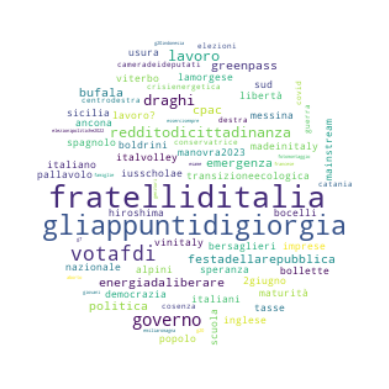

In [128]:
stopwords = set(STOPWORDS)
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# max_wordsnumber (default=200)
wordcloud = WordCloud(background_color="white", mask=mask).generate_from_frequencies(hashtags_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(processed_dir + 'images/hashtags-and-captions-word-cloud.png')
plt.show()

## Video Transcriptions

In [77]:
transcription_text = []
transcription_dir_location_en = transcription_dir_location + 'en/'

def parse_text(file_location): 
    transcriptions_df = pd.read_json(file_location)
    transcription_text.append(transcriptions_df[0].iloc[0])

for file_name in os.listdir(transcription_dir_location_en):
    parse_text(transcription_dir_location_en + file_name)

transcription_text =  '\n'.join(transcription_text)

## Video Transcription Wordcloud

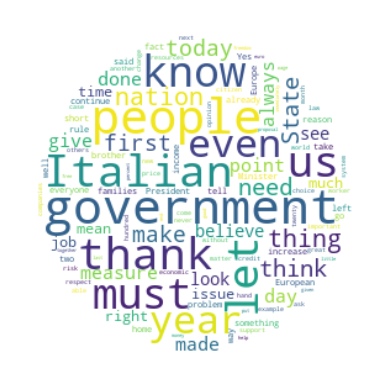

In [78]:

stopwords = set(STOPWORDS)
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
wordcloud = WordCloud(background_color="white", stopwords=stopwords, mask=mask).generate(transcription_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(processed_dir + 'images/audio-word-cloud.png')
plt.show()

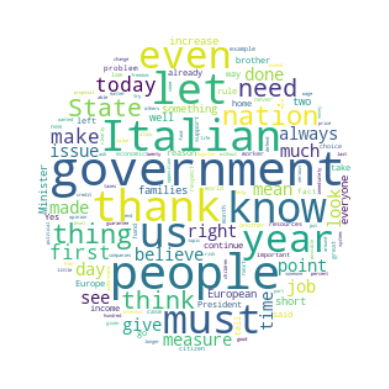

In [60]:
stopwords = set(STOPWORDS)
# stop_words = STOPWORDS.update(['Italy'])

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(background_color="white", stopwords=stopwords, mask=mask).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig(processed_dir + 'images/hashtags-and-captions-word-cloud.png')
plt.show()